In [1]:
import scipy.ndimage
import numpy as np

In [2]:
mat = scipy.ndimage.imread('climate_rainfallmap.gif')

In [3]:
sea = mat[0,0]

In [4]:
sea

array([255, 255, 255, 255], dtype=uint8)

In [5]:
colors = mat.reshape(mat.shape[0] * mat.shape[1], mat.shape[2])
unique_colors = np.vstack({tuple(row) for row in colors})

In [6]:
# Taken from the scale in the image
scale = np.column_stack((np.array([205, 155, 152, 59, 20, 86, 0, 205, 199, 138]),
                       np.array([187, 205, 245, 216, 177, 108, 0, 131, 87, 25]),
                       np.array([110, 155, 255, 255, 255, 243, 223, 227, 180, 96]),
                       255*np.ones(10)))

In [7]:
scale = np.vstack([sea, scale])

In [8]:
scale

array([[ 255.,  255.,  255.,  255.],
       [ 205.,  187.,  110.,  255.],
       [ 155.,  205.,  155.,  255.],
       [ 152.,  245.,  255.,  255.],
       [  59.,  216.,  255.,  255.],
       [  20.,  177.,  255.,  255.],
       [  86.,  108.,  243.,  255.],
       [   0.,    0.,  223.,  255.],
       [ 205.,  131.,  227.,  255.],
       [ 199.,   87.,  180.,  255.],
       [ 138.,   25.,   96.,  255.]])

In [9]:
converted = np.array([np.array([np.linalg.norm(row) for row in scale - color]).argmin() for color in colors])

In [10]:
lookup = np.array([0,6,8,10,12,14,16,20,24,28,36])

In [12]:
map_converted = lookup[converted.reshape(mat.shape[:2])]

In [14]:
rows = np.sum(map_converted, 1) != 0
cols = np.sum(map_converted, 0) != 0

In [15]:
map_remove_sea = (map_converted[rows, :])[:,cols]

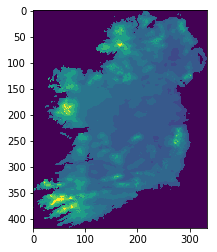

In [16]:
import matplotlib.pyplot as plt
plt.imshow(map_remove_sea)
plt.show()

In [17]:
map_remove_sea.shape[0]/map_remove_sea.shape[1]

1.251497005988024

In [20]:
map_remove_sea.shape

(418, 334)

In [21]:
np.savetxt('precip.mat', map_remove_sea)